In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image = cv.imread('/content/drive/MyDrive/University/Computer Vision/references/skeleton.jpg')

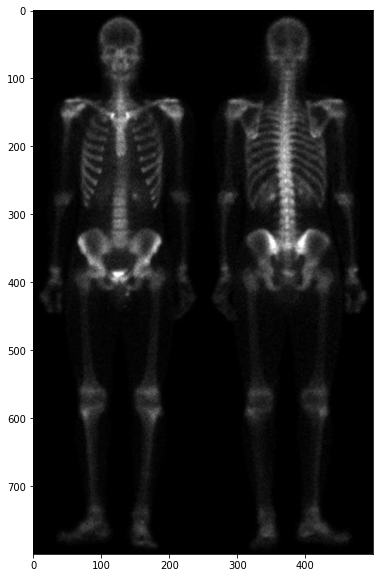

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(image, cmap='gray')

In [ ]:
# Laplasian

In [6]:
image_Laplasian = image.copy()
image_Laplasian = cv.Laplacian(image_Laplasian, cv.CV_64F)

In [7]:
normalized_image_laplassian = image_Laplasian.copy()
Imax = np.max(normalized_image_laplassian)
Imin = np.min(normalized_image_laplassian)
Omin, Omax = 0, 255
a = float(Omax - Omin) / (Imax - Imin)
b = Omin - a * Imin
normalized_image_laplassian = a * normalized_image_laplassian + b
normalized_image_laplassian = normalized_image_laplassian.astype(np.uint8)

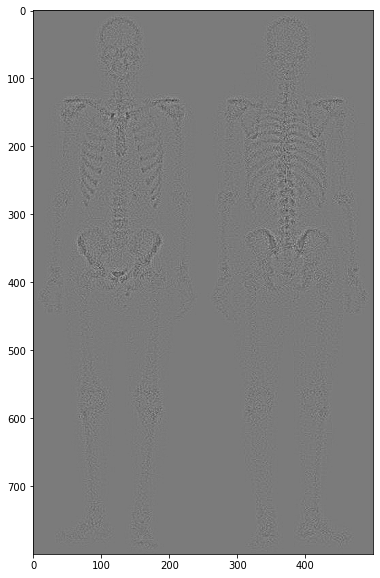

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(normalized_image_laplassian)

In [ ]:
# Summ

In [9]:
image_summ = cv.addWeighted(image, 1, normalized_image_laplassian, 1, 0)
image_summ = np.uint8(image_summ)

normalized_image_summ = image_summ.copy()
Imax = np.max(normalized_image_summ)
Imin = np.min(normalized_image_summ)
Omin, Omax = 0, 255
a = float(Omax - Omin) / (Imax - Imin)
b = Omin - a * Imin
normalized_image_summ = a * normalized_image_summ + b
normalized_image_summ = normalized_image_summ.astype(np.uint8)

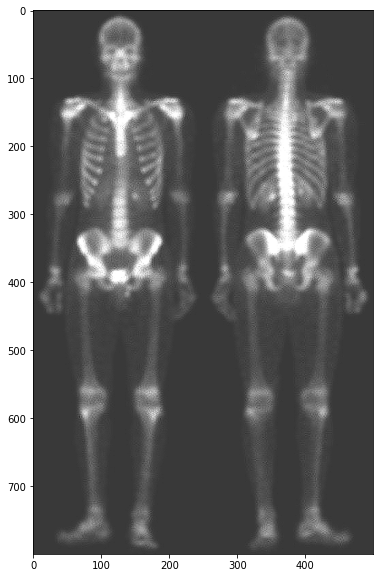

In [10]:
plt.figure(figsize=(20,10))
plt.imshow(normalized_image_summ)

In [ ]:
# Sobel

In [11]:
image_sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, 3)
image_sobely = cv.Sobel(image, cv.CV_64F, 0, 1, 3)
image_sobelx = cv.convertScaleAbs(image_sobelx)
image_sobely = cv.convertScaleAbs(image_sobely)
image_sobelxy = cv.add(image_sobelx, image_sobely)
image_sobelxy = np.uint8(image_sobelxy)

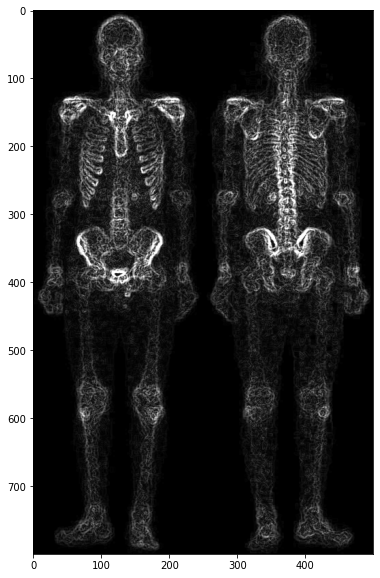

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(image_sobelxy)

In [ ]:
# Сглаживание Sobel

In [13]:
image_medianBlur = cv.medianBlur(image_sobelxy, 5)
image_medianBlur = np.uint8(image_medianBlur)

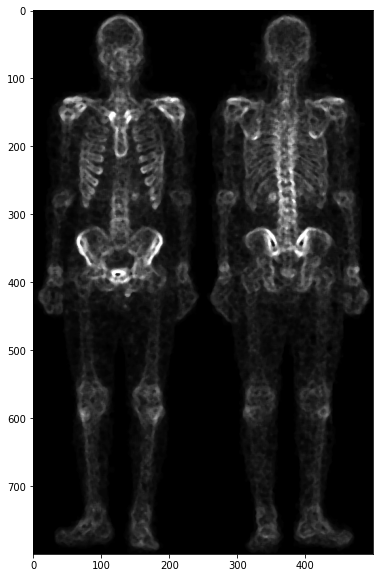

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(image_medianBlur)

In [ ]:
# Mask blur*summ

In [15]:
image_mask = (normalized_image_summ / 255) * image_medianBlur
image_mask = np.uint8(image_mask)

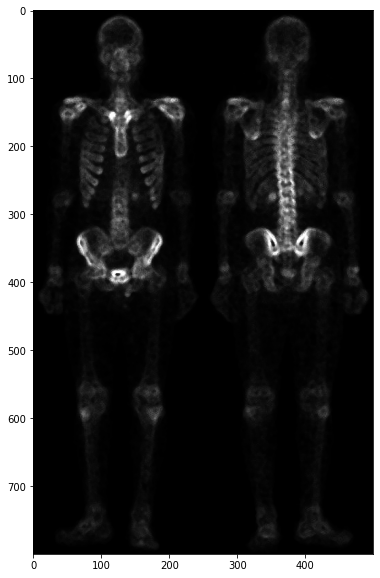

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(image_mask)

In [ ]:
# повышение резкости

In [17]:
image_summ_2 = cv.add(image, image_mask)
image_summ_2 = np.uint8(image_summ_2)

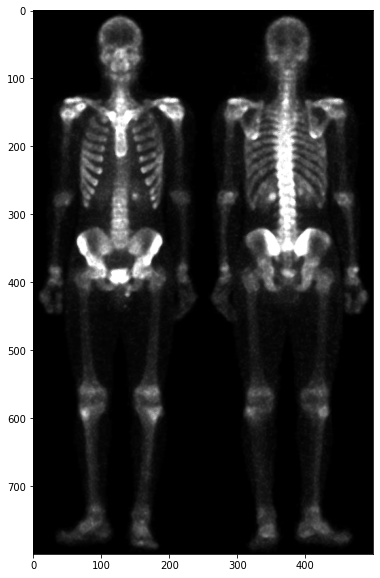

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(image_summ_2)

In [ ]:
# градация по степенному закону

In [19]:
gamma = 0.5
image_correction = 255 * (image_summ_2 / 255) ** gamma
image_correction = np.uint8(image_correction)

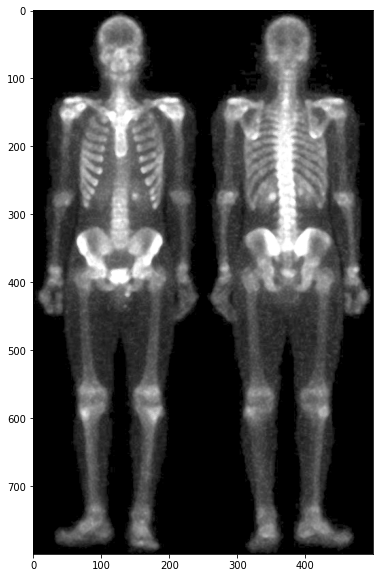

In [20]:
plt.figure(figsize=(20,10))
plt.imshow(image_correction)